In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [245]:
import cPickle as pickle
import glob, os
RESULTS_DIR = '../RESULTS/'

results = {}
for filepath in glob.glob(RESULTS_DIR+'Figure12*.p'):
  with open(filepath, 'r') as f:
    results[os.path.basename(filepath)] = pickle.load(f)
    
def create_mapping(results):

  all_results = {}

  for r in results:

    # experiment _ dataset_number _ classifier _ frames/noframed _ results.p
    r_splitted = r.split('_')

    dataset_number = r_splitted[1]
    classifier = r_splitted[2]
    framed = r_splitted[3]

    if not dataset_number in all_results:
      all_results[dataset_number] = {}

    if not classifier in all_results[dataset_number]:
      all_results[dataset_number][classifier] = {}

    all_results[dataset_number][classifier][framed] = results[r]
    
  return all_results

results = create_mapping(results)

In [220]:
def average_one_sample(data, WHITELIST = ['acc', 'loss', 'val_acc', 'val_loss', 'test_acc', 'test_loss']):
  
  results = analyze(data)
  
  for w in WHITELIST:
    results[w] = np.mean(results[w], axis=0)
    
#   plot_one(results, WHITELIST)

  return results

def plot_one_sample(data, WHITELIST = ['acc', 'loss', 'val_acc', 'val_loss', 'test_acc', 'test_loss']):
  
  # first analyze
  results = analyze(data)
  
  plot_one(results, WHITELIST)

def analyze(data, WHITELIST = ['acc', 'loss', 'val_acc', 'val_loss', 'test_acc', 'test_loss']):
  NO_SPLITS = 10
  NO_REPEATS = 2
  
  VALUES = {}
  
  for w in WHITELIST:
    VALUES[w]  = analyze_one_value(data, w, NO_REPEATS=NO_REPEATS, NO_SPLITS=NO_SPLITS)

  return VALUES
  
def analyze_one_value(data, which, NO_REPEATS = 2, NO_SPLITS = 10):
  
  values = []
  
  for r in range(NO_REPEATS):
    
    data_for_one_sample = data[r*NO_SPLITS:r*NO_SPLITS+NO_SPLITS]
    
    sample = []
    
    for s in range(NO_SPLITS):
      
      sample.append(data_for_one_sample[s][which])
      
    values.append(sample)

  avg_values = np.array(values[0])
  avg_values[:] = 0.

  for s in range(NO_REPEATS):
    avg_values += values[s]

  avg_values /= NO_REPEATS

  return avg_values
  
def plot_one(data, which):
  
  for w in which:
    plt.figure()
    
    plt.ylabel(w)
    
    if data[w].ndim == 1:
      plt.xlabel('sample')
      plt.plot(data[w])
    else:
      plt.xlabel('epoch')
      for d in data[w]:
        plt.plot(d)
  
def plot_one_sample_with_average(data):
  
  averages = average_one_sample(data)
  results = analyze(data)
  
  for k in averages:

    plot_one(results, [k])
    if np.isscalar(averages[k]):
      averages[k] = [averages[k]]*10
    plot(averages[k], color='white')

In [10]:
a = results[results.keys()[0]]

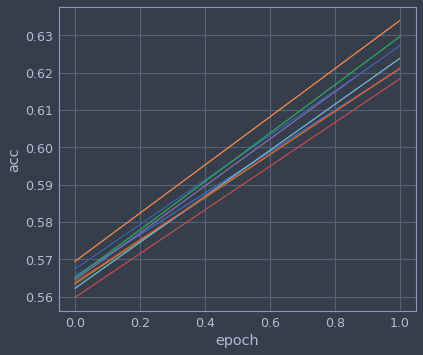

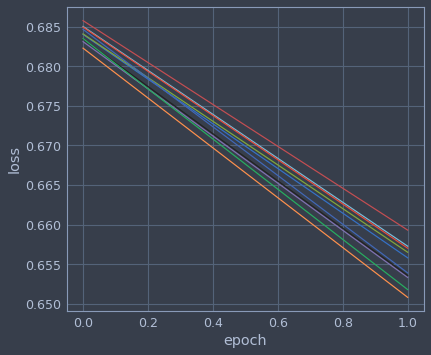

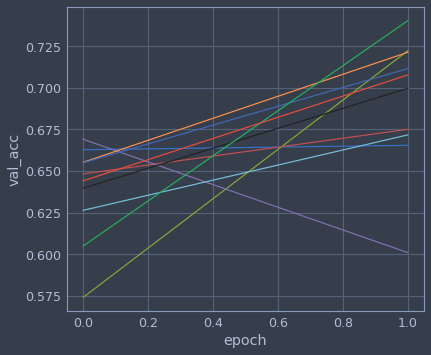

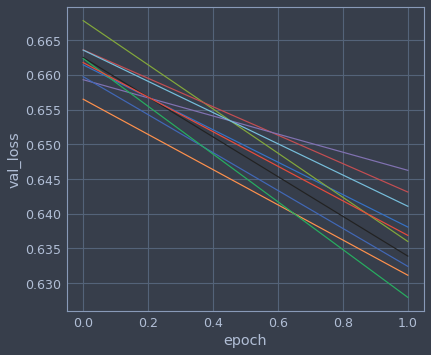

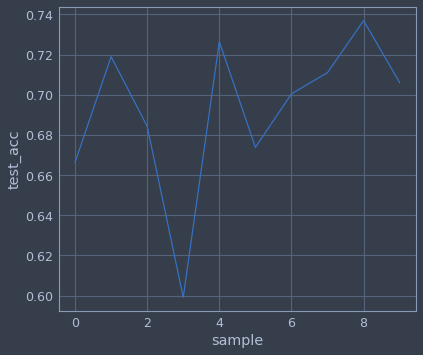

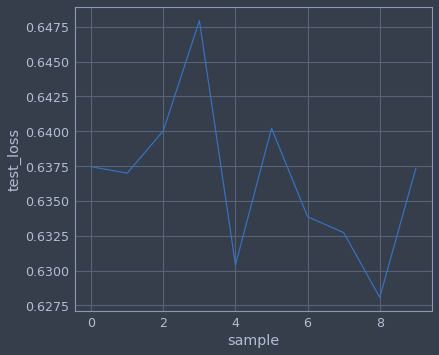

In [150]:
plot_one_sample(a)

In [183]:
average_one_sample(a)

{'acc': array([ 0.56483509,  0.62509165]),
 'loss': array([ 0.68406228,  0.65493278]),
 'test_acc': 0.69232584373999861,
 'test_loss': 0.6365064597581529,
 'val_acc': array([ 0.63791154,  0.69160151]),
 'val_loss': array([ 0.66188729,  0.63668782])}

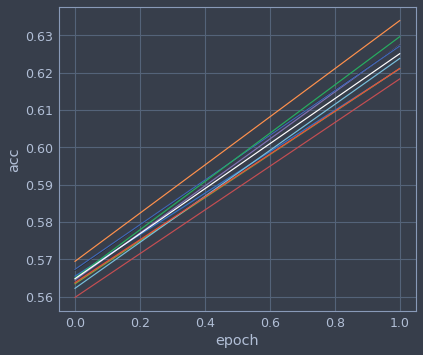

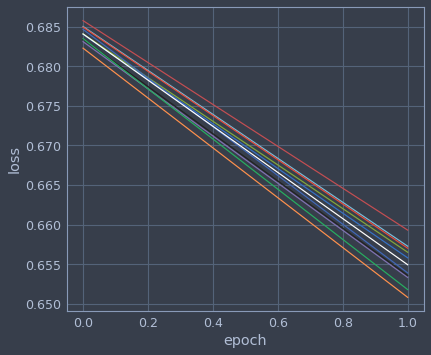

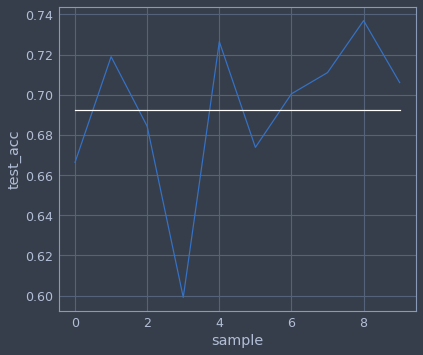

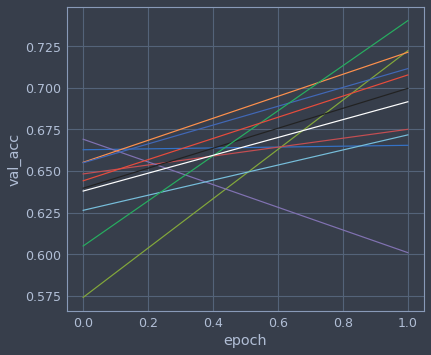

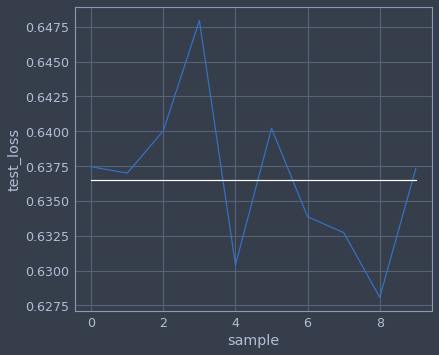

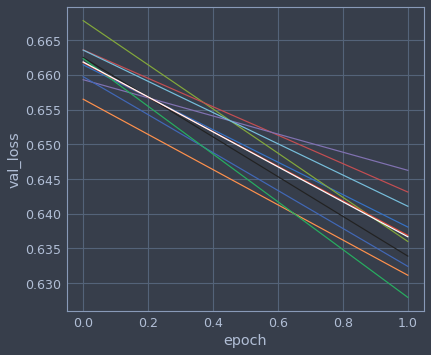

In [221]:
plot_one_sample_with_average(a)

In [292]:
def compare_framed_noframed(results, dataset, classifier):
  
  avg1 = average_one_sample(results[str(dataset)][classifier]['Framed'])
  avg2 = average_one_sample(results[str(dataset)][classifier]['NoFramed'])

  for w in ['acc', 'loss', 'val_acc', 'val_loss']:

    plt.figure()
    plt.xlabel('epoch')
    plt.ylabel(w)
    plot(avg1[w], label='Framed')
    plot(avg2[w], label='Not Framed')
    plt.legend()
    
def compare_all_classifiers_between_experiments(results, dataset, what=['acc', 'loss', 'val_acc', 'val_loss']):
  
  for c in ['MLP', 'LeNet', 'VGG19', 'Xception']:

    avg1 = average_one_sample(results[str(dataset)][c]['Framed'])
    avg2 = average_one_sample(results[str(dataset)][c]['NoFramed'])

    for w in what:
      
      plt.figure()
      plt.title(c)
      plt.xlabel('epoch')
      plt.ylabel(w)
      plot(avg1[w], label='Framed')
      plot(avg2[w], label='Not Framed')
      plt.legend()    

In [242]:
# grab dataset 4
dataset4 = all_results['4']

MLP = dataset4['MLP']
MLP_framed = MLP['Framed']
MLP_noframed = MLP['NoFramed']

In [243]:
average_one_sample(MLP_noframed)

{'acc': array([ 0.79023832,  0.96255687]),
 'loss': array([ 0.46258908,  0.17778181]),
 'test_acc': 0.99851501949205024,
 'test_loss': 0.097408444348120501,
 'val_acc': array([ 0.98339133,  0.99864446]),
 'val_loss': array([ 0.22238778,  0.09692061])}

In [244]:
average_one_sample(MLP_framed)

{'acc': array([ 0.77334048,  0.95415609]),
 'loss': array([ 0.48403875,  0.19437833]),
 'test_acc': 0.99724995198259947,
 'test_loss': 0.10853754965693582,
 'val_acc': array([ 0.98130472,  0.9976356 ]),
 'val_loss': array([ 0.24126584,  0.10810975])}

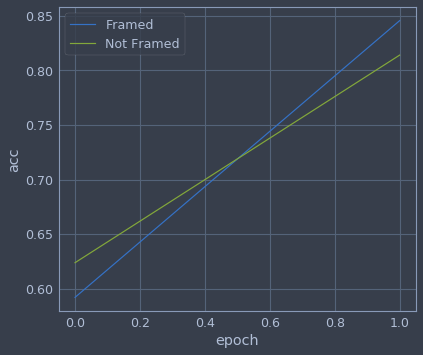

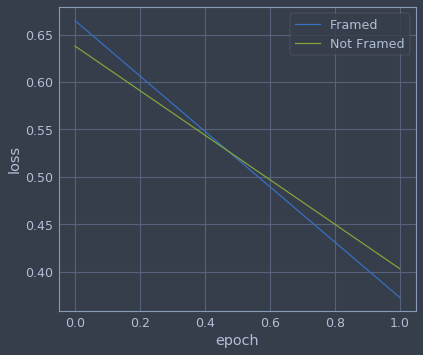

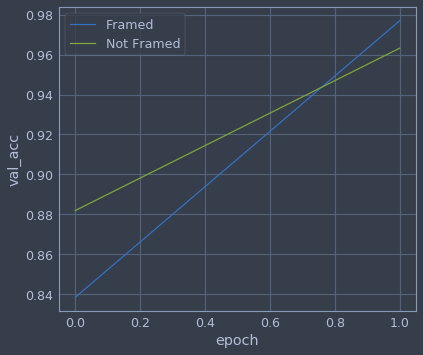

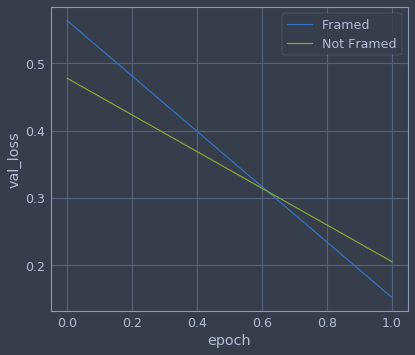

In [289]:
compare_framed_noframed(results, 4, 'LeNet')

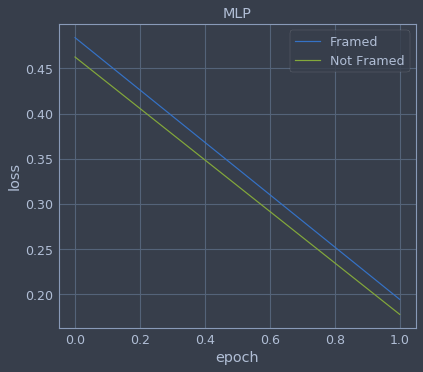

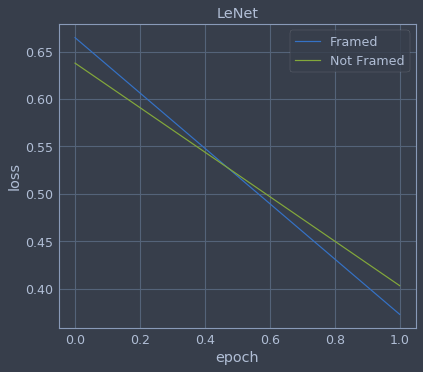

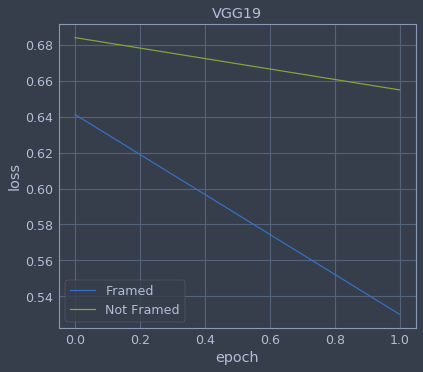

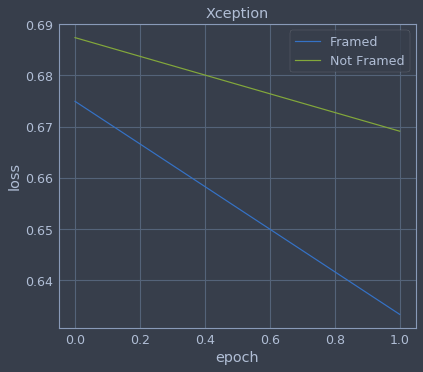

In [293]:
compare_all_classifiers_between_experiments(results, 4, what=['loss'])

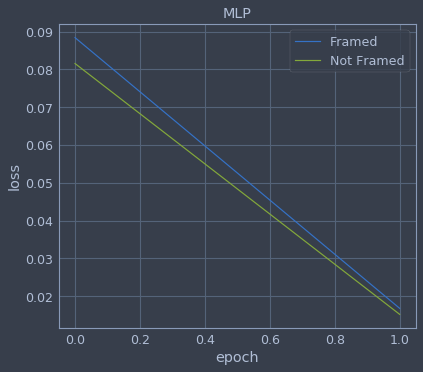

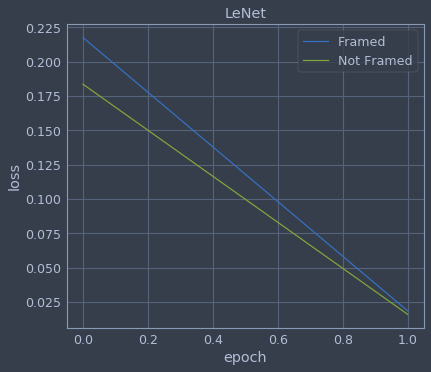

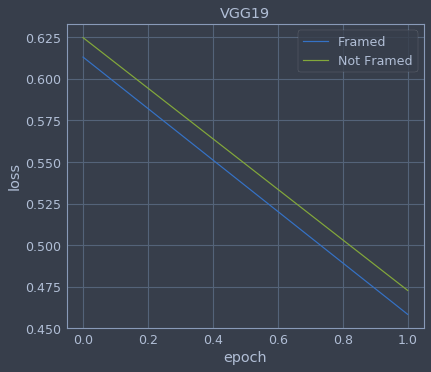

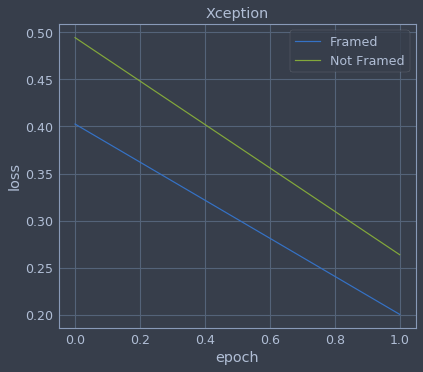

In [294]:
compare_all_classifiers_between_experiments(results, 1, what=['loss'])

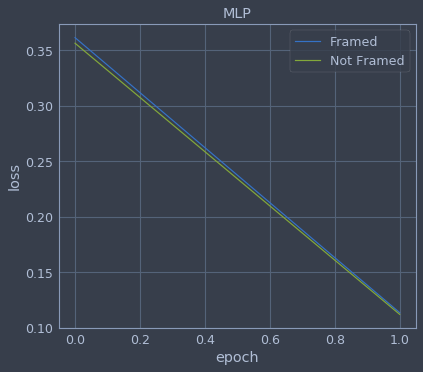

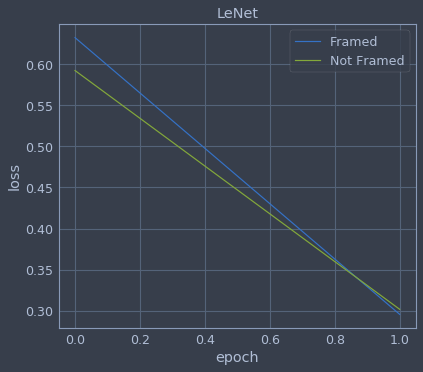

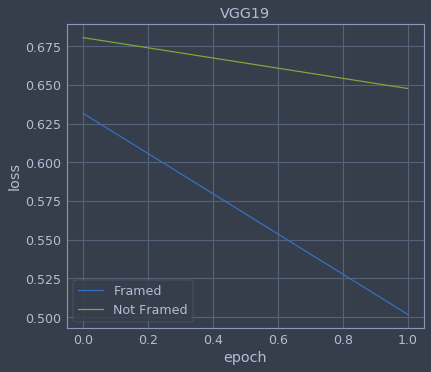

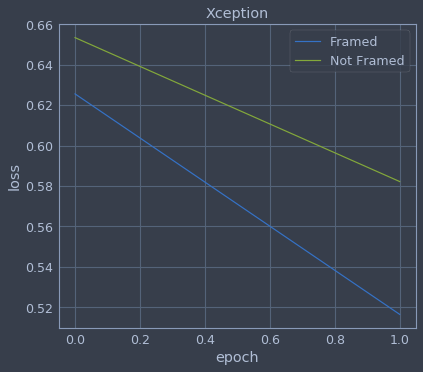

In [295]:
compare_all_classifiers_between_experiments(results, 2, what=['loss'])

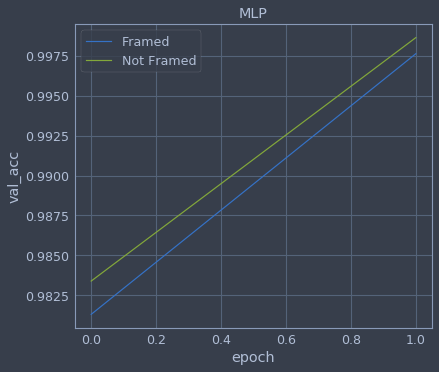

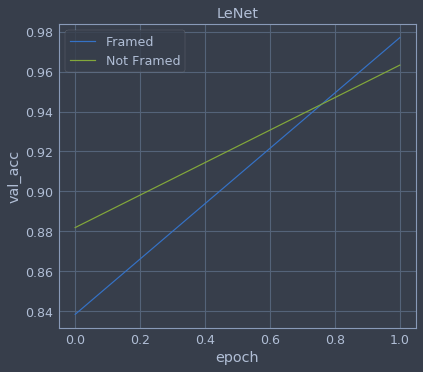

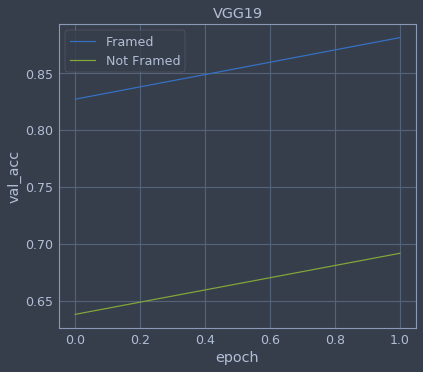

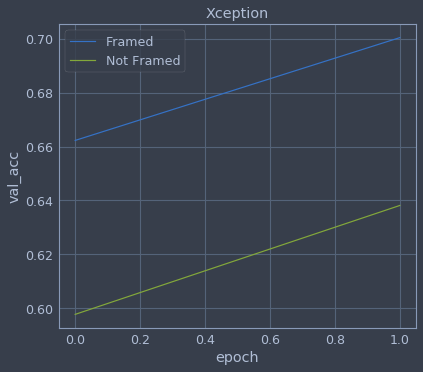

In [308]:
compare_all_classifiers_between_experiments(results, 4, what=['val_acc'])